<a href="https://colab.research.google.com/github/SIRREG001/Google-Playstore/blob/main/Google_Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the important Python modules for the project


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


importing the file from Kaggle on Google Playstore

In [28]:
df_store =pd.read_csv("/content/googleplaystore.csv")

Data Cleaning

In [3]:
#Check for Null values from Data Summary
df_store.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Generate Descriptive Statistics of numerical columns

In [32]:
df_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [33]:
# check for duplicate values
df_store.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [34]:
df_store.duplicated().sum()

483

In [35]:
#drop rows with missing values
df_store.dropna(inplace=True)

#drop rows that are duplicated
df_store.drop_duplicates(inplace=True)

In [36]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [37]:
#check for remaining duplicates
df_store.duplicated().sum()

0

In [38]:
#Change the data type of Installs column to numerical data type and remove the comma and the plus symbols
df_store['Installs'] = df_store['Installs'].str.replace('+', '') #Remove '+' signs
df_store['Installs'] = df_store['Installs'].str.replace(',', '') #Remove ',' signs

df_store['Installs'] = df_store['Installs'].astype(int) #convert data type from object to int

#Change the data type of Reviews column to numerical data type:
df_store['Reviews'] = df_store['Reviews'].astype(int) #convert from float data type to int


In [39]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [40]:
df_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Data Visualization


Text(0.5, 1.0, 'Distribution of App Categories')

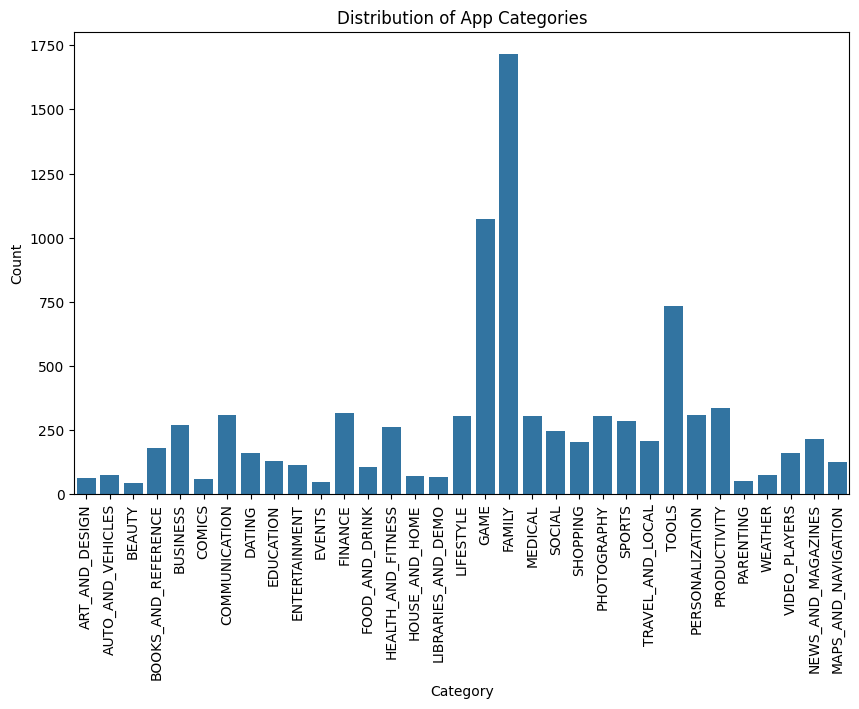

In [14]:
#Creating a Bar Plot

plt.figure(figsize=(10, 6))
sns.countplot(data=df_store, x='Category') #plot a count plot a type of Bar chart
plt.xlabel('Category')
plt.xticks(rotation=90)  #rotate the xlabels to be vertical since it may overlap with their names
plt.ylabel('Count')
plt.title('Distribution of App Categories')

Text(0.5, 1.0, 'Relationship between Reviews and Rating')

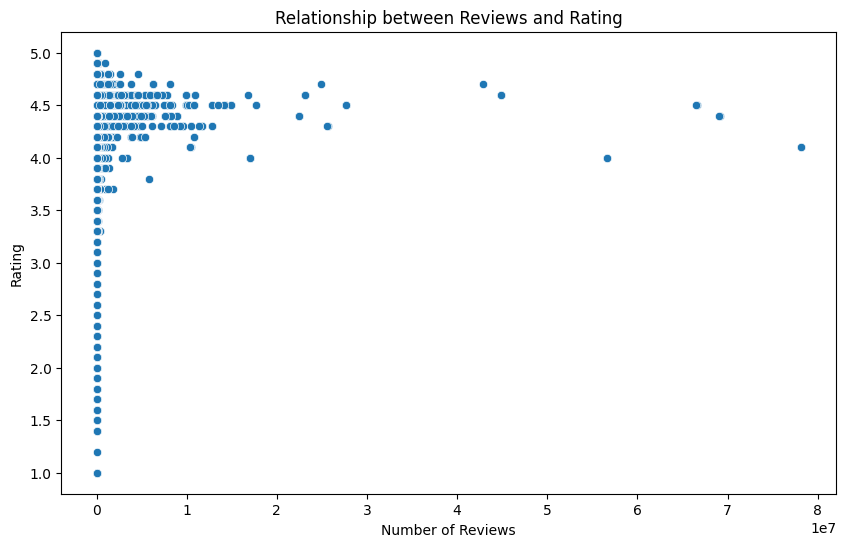

In [15]:
#Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_store, x='Reviews', y='Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Relationship between Reviews and Rating')

Text(0.5, 1.0, 'Distribution of Installs across Categories')

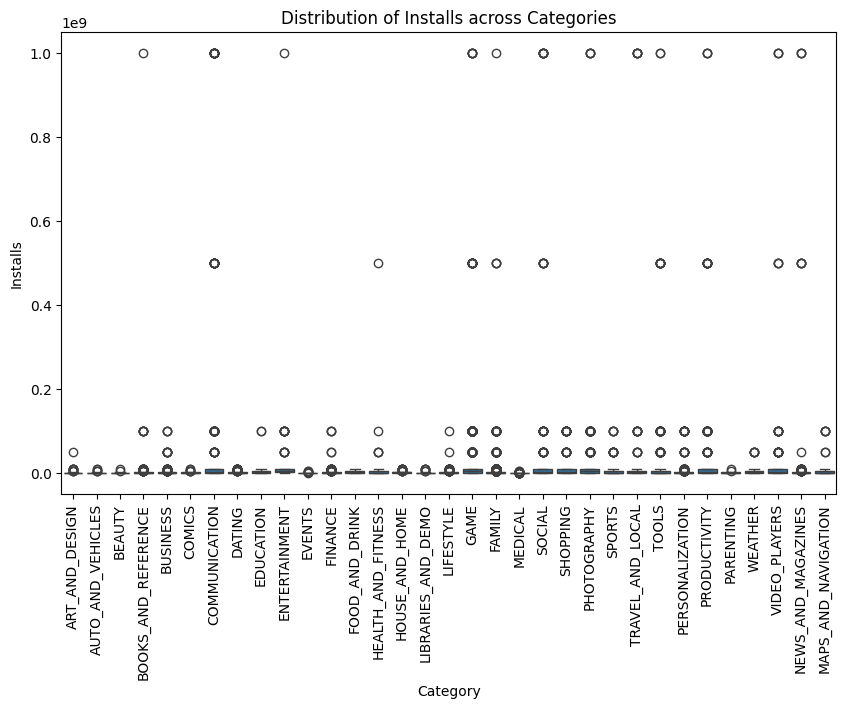

In [16]:
#Create a Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_store, x='Category', y='Installs')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title("Distribution of Installs across Categories")

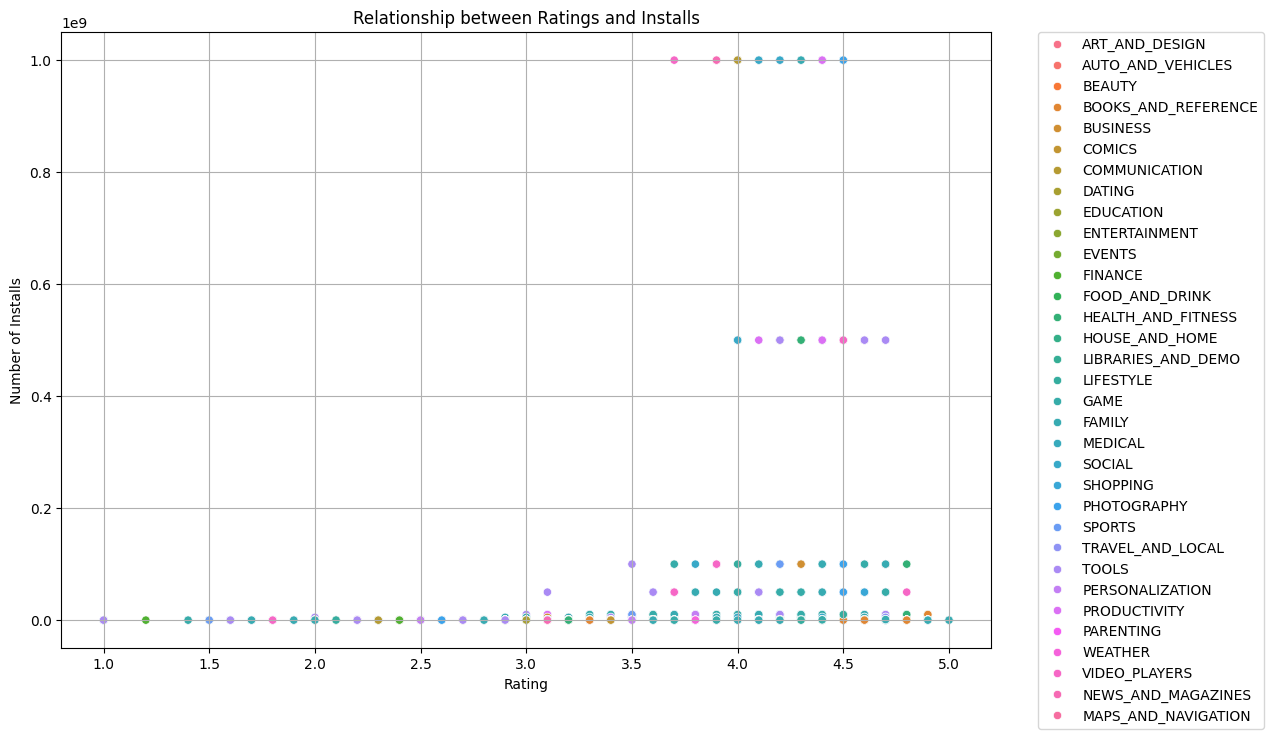

In [17]:
#Scatter plot: Rating vs Installs
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_store, x='Rating', y='Installs', hue='Category')
plt.grid(True)
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Relationship between Ratings and Installs')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [18]:
df_store.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [19]:
#Convert 'Last updated' to datetime
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])

#Set 'Last Updated' as the index
df_store.set_index('Last Updated', inplace=True)
#Resample 'Rating' to monthly frequency
df_store_monthly = df_store['Rating'].resample('M').mean()

Text(0.5, 1.0, 'Average Rating Trend over Time')

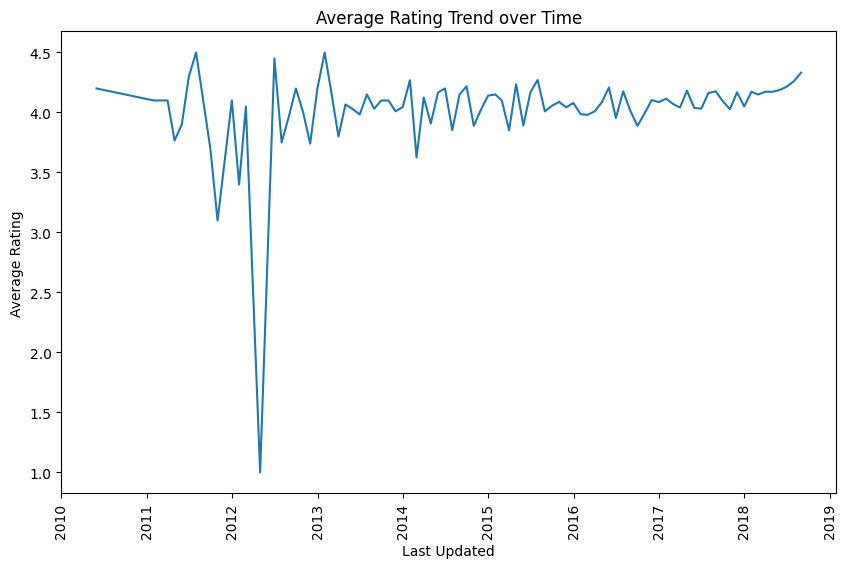

In [20]:
#Line plot of Average Rating over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store_monthly)
plt.xlabel('Last Updated')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time')

Statistical Analysis and Hypothesis Testing

In [21]:
from scipy.stats import ttest_ind
free_apps = df_store[df_store['Type']=='Free']
paid_apps = df_store[df_store['Type']=='Paid']

#Perform t-test
t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])

#Checking the p-value
if p_value < 0.05:
  print("Reject null hypothesis: with the ", p_value, " value, there is a significant difference in ratings")
else:
  print("Fail to reject null hypothesis: with the ", p_value, " value, there is no significant difference in ratings")


Reject null hypothesis: with the  0.0002984015230732988  value, there is a significant difference in ratings


Creating Visualization Dashboard

In [24]:
!pip install packaging
!pip install pandas dash
!pip install httpx==0.20 dash plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 8.3 MB/s eta 0:00:00


In [26]:
#import required packages
import plotly.express as px
import dash
from dash import html
from dash import dcc

In [41]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [45]:
#using plotly.express to replot our charts
fig1 = px.histogram(df_store, x='Category', title='Distribution of App Categories')
fig1.update_traces(orientation="v")
fig1.show()


In [46]:
fig2 = px.scatter(df_store, x='Reviews', y='Rating', title='Relationship between Reviews and Rating')
fig2.show()

In [50]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
fig3 = px.pie(df_store, values='Rating', names='Category', title='Pie Chart of App Ratings by Category')

fig3.show()




In [53]:
#create dashboard application
app = dash.Dash(__name__);
#Include the plots and style
app.layout = html.Div(
    children = [html.H1('Google Play Store Application Analysis',
                        style={'textAlign': 'center', 'color':'#503D36',
                               'fontsize':40}),
                html.P('Plots showing Analysis of Different Google Play Application',
                       style={'textAlign':'center', 'color':'#F57241'}),
                dcc.Graph(figure=fig1),
                dcc.Graph(figure=fig2),
                dcc.Graph(figure=fig3)
                ]);
#Run the dashboard application
if __name__ == '__main__':
  app.run_server();

<IPython.core.display.Javascript object>